# ===========================================
# Full Comparison EDA: Original vs Augmented
# ===========================================

In [1]:
#  Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
data = pd.read_csv('../Data/Augmented_Combined_data.csv', parse_dates=['Time'], index_col='Time')

In [3]:
# Split Original & Augmented
original_data = data[data['augmented'] == 0]
augmented_data = data[data['augmented'] != 0]

In [4]:
len(augmented_data), len(original_data), len(augmented_data)+len(original_data)

(876000, 175200, 1051200)

In [5]:
#  Identify Numeric Columns (excluding non-numeric ones)
exclude_cols = ['Location', 'augmented']
numeric_cols = [col for col in data.columns if col not in exclude_cols]

In [6]:
# Descriptive Statistics Comparison
print("===== Descriptive Statistics: ORIGINAL =====")
display(original_data[numeric_cols].describe())

print("===== Descriptive Statistics: AUGMENTED =====")
display(augmented_data[numeric_cols].describe())

===== Descriptive Statistics: ORIGINAL =====


,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
count,175200.000000,175200.000000,175200.000000,175200.000000,175200.000000,175200.000000,175200.000000,175200.000000,175200.000000
mean,46.655994,70.155291,36.516241,4.157639,6.879334,201.589446,201.539070,8.038205,0.303429
std,22.012738,17.326678,20.933153,2.012682,3.043964,99.639040,100.683777,3.617488,0.257325
min,-31.200000,9.000000,-36.200000,0.000000,0.000000,1.000000,0.000000,0.500000,0.000000
25%,30.200000,57.000000,21.900000,2.630000,4.700000,130.000000,129.000000,5.300000,0.087700
50%,46.900000,72.000000,36.200000,3.850000,6.680000,211.000000,211.000000,7.600000,0.233100
75%,65.300000,84.000000,54.600000,5.380000,8.800000,288.000000,290.000000,10.300000,0.474200
max,101.700000,100.000000,78.700000,18.530000,24.590000,360.000000,360.000000,29.200000,0.999400


===== Descriptive Statistics: AUGMENTED =====


,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
count,876000.000000,876000.000000,876000.000000,876000.000000,876000.000000,876000.000000,876000.000000,876000.000000,876000.000000
mean,47.216437,69.972360,35.536520,4.169914,7.042256,201.589446,201.539070,8.006373,0.303429
std,22.523771,17.485714,20.448247,2.049136,3.138323,99.638812,100.683547,3.649090,0.257324
min,-31.559546,8.810378,-37.608544,-0.023484,-0.023605,1.000000,0.000000,0.436673,0.000000
25%,30.427294,57.098867,21.227670,2.624579,4.796371,130.000000,129.000000,5.219739,0.087700
50%,47.369749,71.711565,35.284303,3.844644,6.823102,211.000000,211.000000,7.540346,0.233100
75%,65.875327,84.160736,52.890652,5.386205,9.005553,288.000000,290.000000,10.250870,0.474200
max,118.006697,106.063224,81.721731,20.164220,28.272812,360.000000,360.000000,30.856161,0.999400


In [7]:
# Percentage Change
diff = (augmented_data[numeric_cols].describe() - original_data[numeric_cols].describe()) / original_data[numeric_cols].describe() * 100
print("===== Percentage Difference (Augmented vs Original) =====")
display(diff)

===== Percentage Difference (Augmented vs Original) =====


,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,4.000000e+02
mean,1.201223,-0.260752,-2.682973,0.295237,2.368271,0.000000,0.000000,-0.396012,-1.829460e-14
std,2.321534,0.917869,-2.316453,1.811227,3.099847,-0.000228,-0.000228,0.873598,-2.283110e-04
min,1.152391,-2.106907,3.891005,-inf,-inf,0.000000,NaN,-12.665494,NaN
25%,0.752630,0.173451,-3.069999,-0.206133,2.050445,0.000000,0.000000,-1.514356,0.000000e+00
50%,1.001597,-0.400605,-2.529550,-0.139109,2.142249,0.000000,0.000000,-0.784915,0.000000e+00
75%,0.881053,0.191353,-3.130674,0.115326,2.335827,0.000000,0.000000,-0.476991,0.000000e+00
max,16.034117,6.063224,3.839557,8.819318,14.976870,0.000000,0.000000,5.671785,0.000000e+00


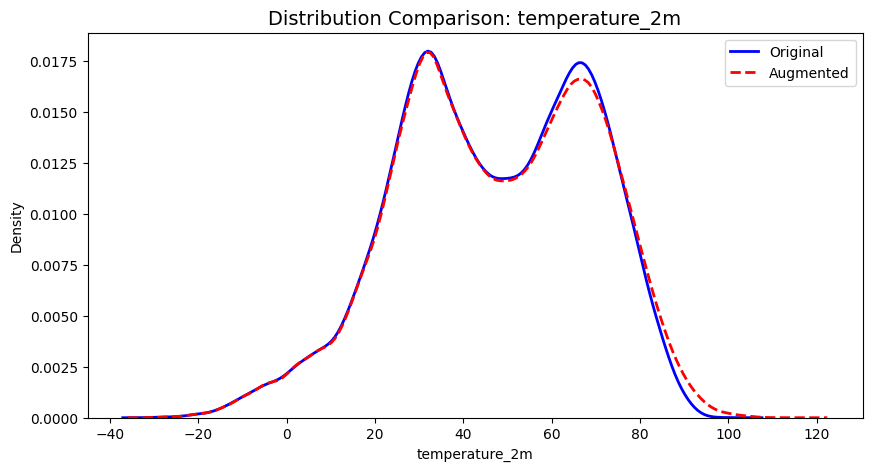

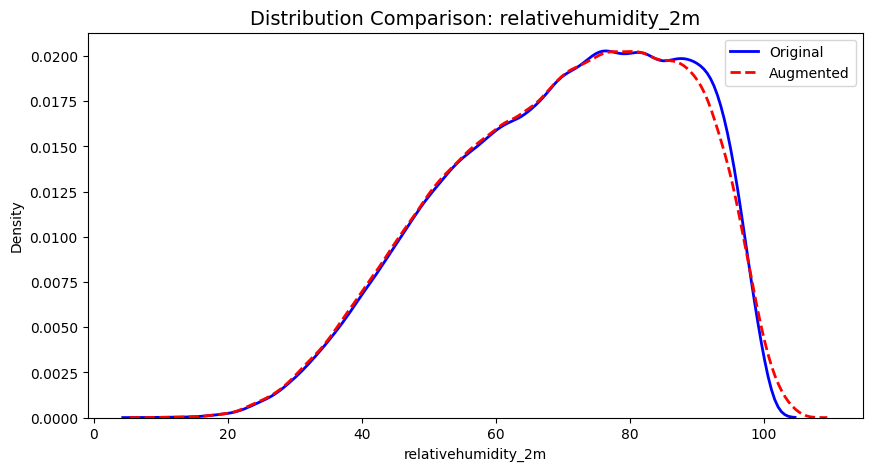

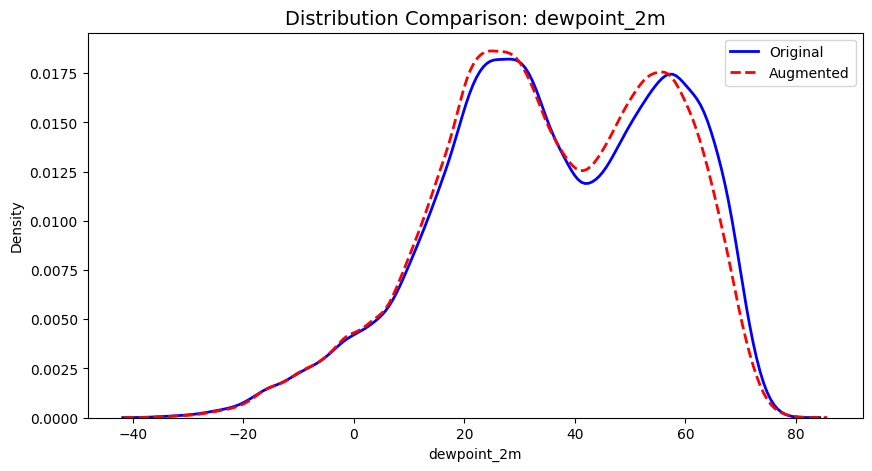

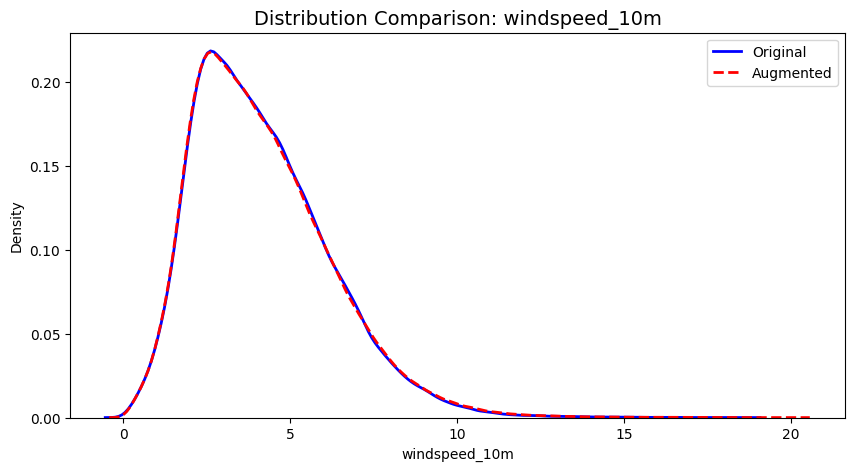

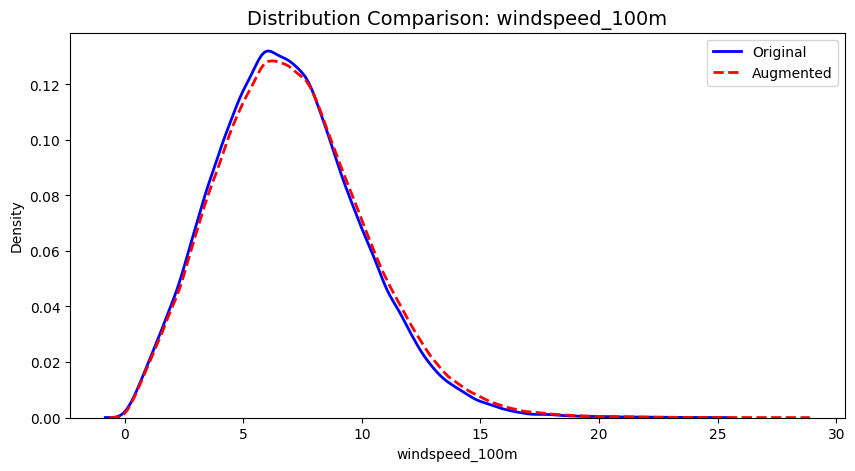

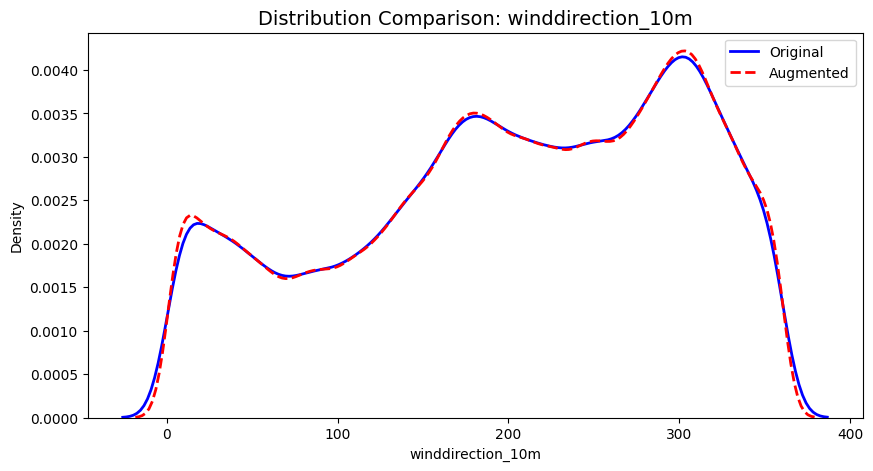

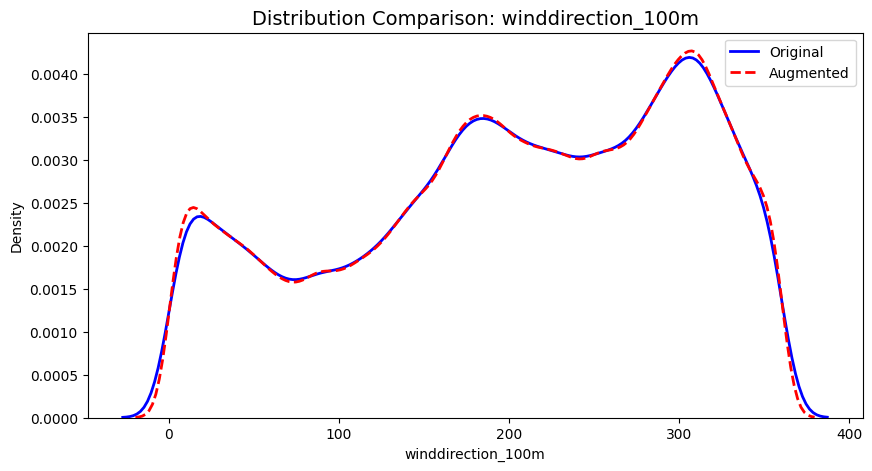

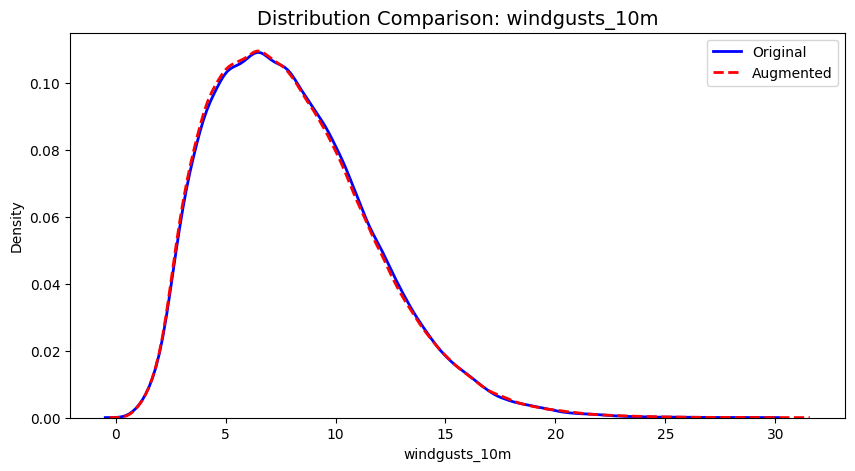

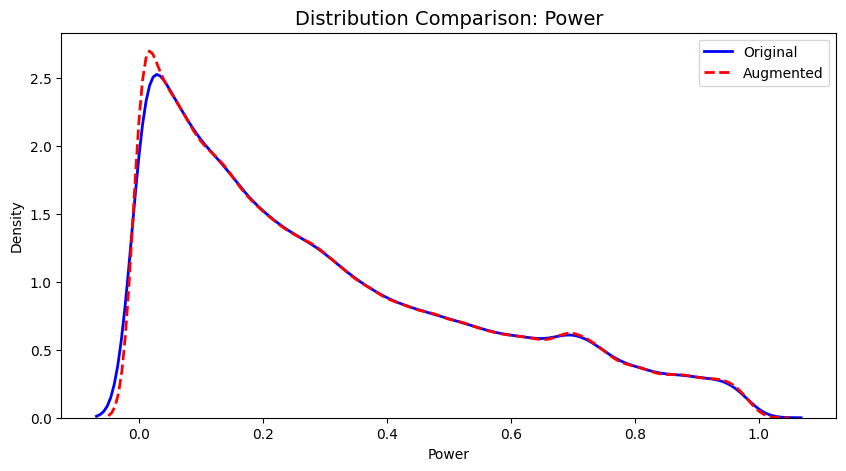

In [8]:
#  Distribution Plots Comparison
for col in numeric_cols:
    plt.figure(figsize=(10,5))
    sns.kdeplot(original_data[col], label='Original', color='blue', linewidth=2)
    sns.kdeplot(augmented_data[col], label='Augmented', color='red', linewidth=2, linestyle='--')
    plt.title(f'Distribution Comparison: {col}', fontsize=14)
    plt.legend()
    plt.show()

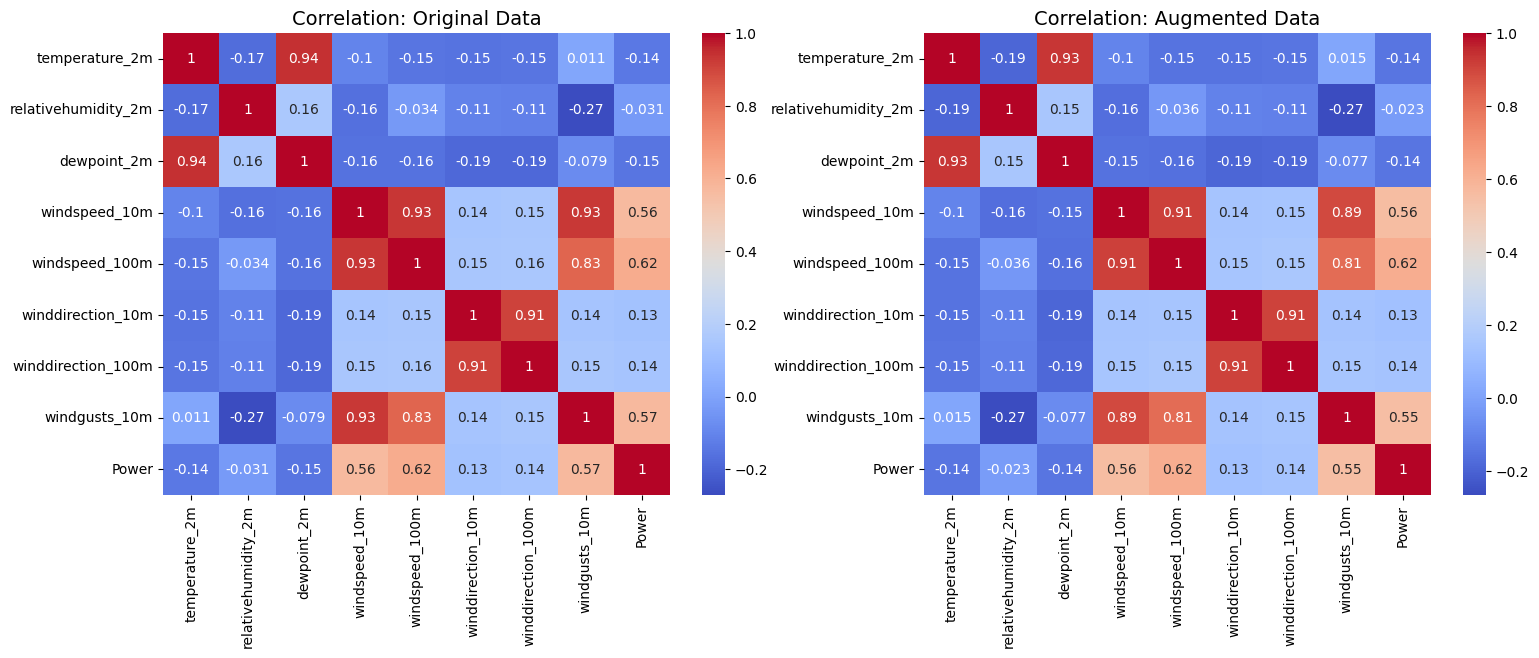

In [9]:
#  Correlation Comparison
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
sns.heatmap(original_data[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation: Original Data", fontsize=14)

plt.subplot(1,2,2)
sns.heatmap(augmented_data[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation: Augmented Data", fontsize=14)

plt.show()

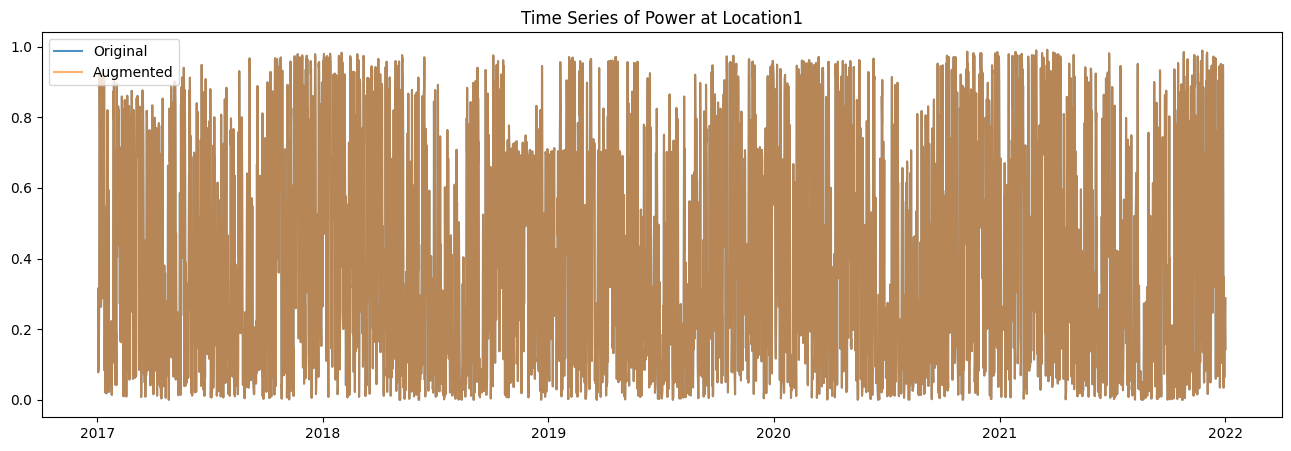

In [10]:
#  Time Series Plot for one location
loc = 'Location1'  # You can loop over locations if needed

plt.figure(figsize=(16,5))
plt.plot(original_data[original_data['Location'] == loc]['Power'], label='Original', alpha=0.8)
plt.plot(augmented_data[augmented_data['Location'] == loc]['Power'], label='Augmented', alpha=0.6)
plt.title(f"Time Series of Power at {loc}")
plt.legend()
plt.show()

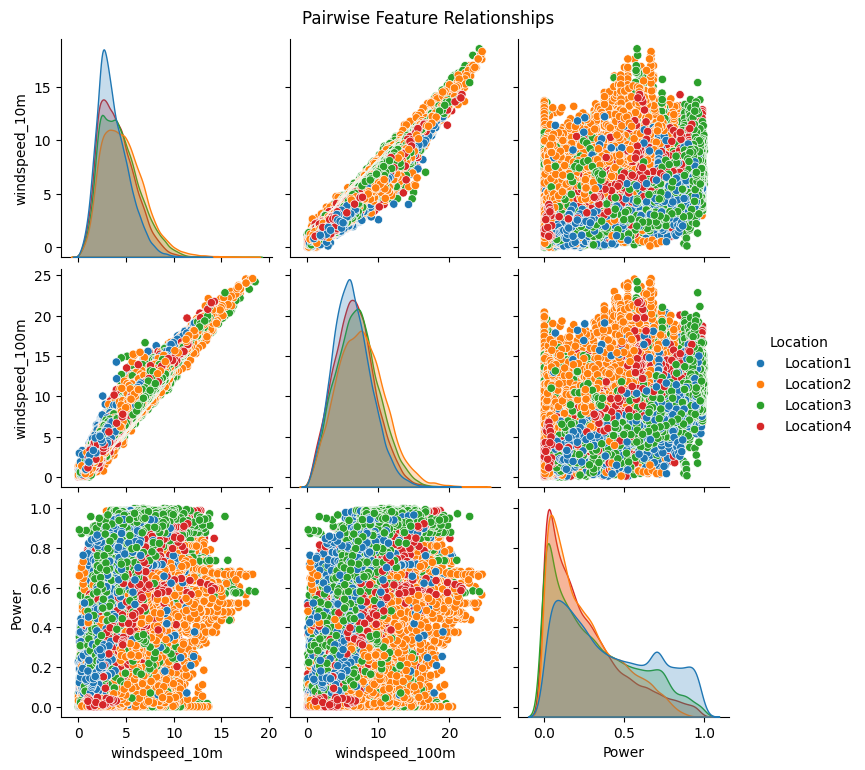

In [11]:
sns.pairplot(data=original_data, vars=['windspeed_10m', 'windspeed_100m', 'Power'], hue='Location')
plt.suptitle('Pairwise Feature Relationships', y=1.02)
plt.show()

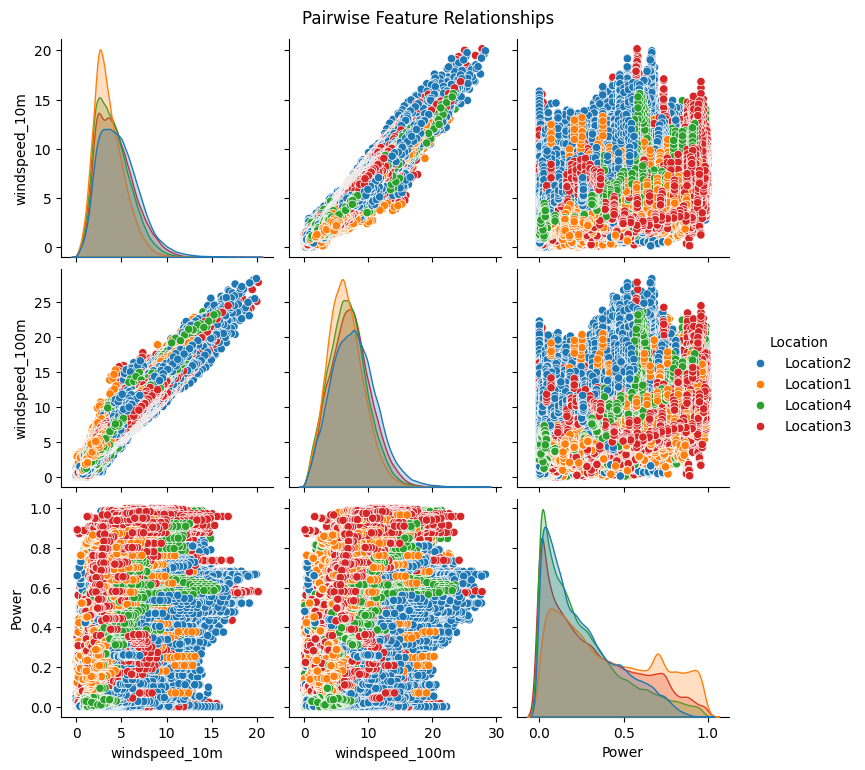

In [12]:
sns.pairplot(data=augmented_data, vars=['windspeed_10m', 'windspeed_100m', 'Power'], hue='Location')
plt.suptitle('Pairwise Feature Relationships', y=1.02)
plt.show()

<Figure size 1200x400 with 0 Axes>

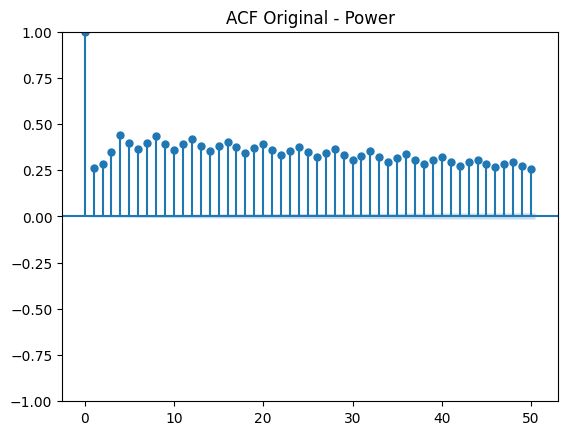

In [19]:
#  Autocorrelation Comparison (for Power)
plt.figure(figsize=(12,4))
plot_acf(original_data['Power'], lags=50, title="ACF Original - Power")
plt.show()

<Figure size 1200x400 with 0 Axes>

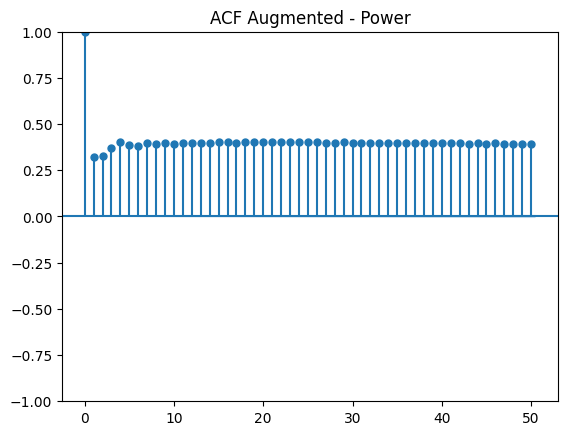

In [20]:
plt.figure(figsize=(12,4))
plot_acf(augmented_data['Power'], lags=50, title="ACF Augmented - Power")
plt.show()

In [21]:
#  ADF Test for Stationarity
adf_orig = adfuller(original_data['Power'])
adf_aug = adfuller(augmented_data['Power'])

print(f"ADF Original - p-value: {adf_orig[1]:.5f}")
print(f"ADF Augmented - p-value: {adf_aug[1]:.5f}")


: 

In [ ]:
# Interpretation
if adf_orig[1] < 0.05:
    print("Original Power: Stationary")
else:
    print("Original Power: Non-stationary")

if adf_aug[1] < 0.05:
    print("Augmented Power: Stationary")
else:
    print("Augmented Power: Non-stationary")